In [13]:
import torch
from torch import nn # Torch Neural Networks
import matplotlib.pyplot as plt

# 1. Workflow

## 1. Data

torch.Size([50]) torch.Size([50])


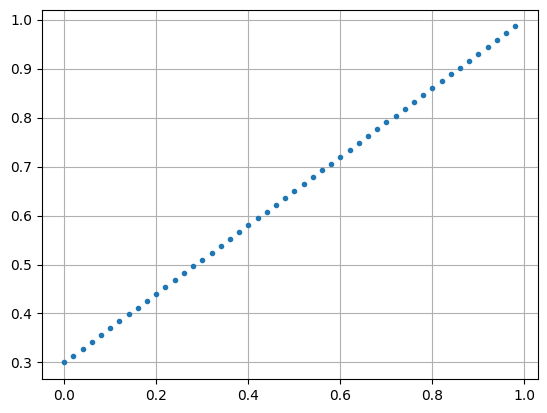

In [14]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step)
y = weight * x + bias

print(x.shape, y.shape)

plt.plot(x, y, '.')
plt.grid()

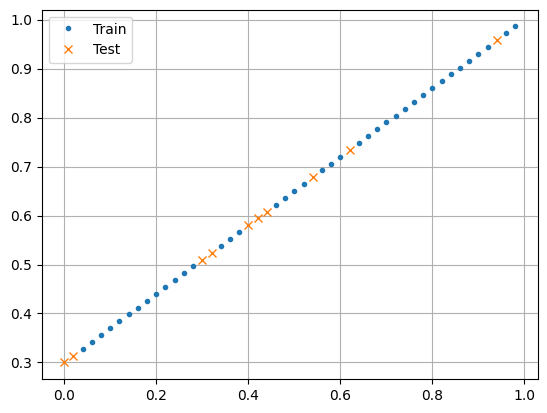

In [15]:
# Shuffle
shuffle_idx = torch.randperm(x.shape[0])
x = x[shuffle_idx]
y = y[shuffle_idx]

# Train/Test split (80/20)
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

def plot_train_test():
  plt.plot(x_train, y_train, '.', label='Train')
  plt.plot(x_test, y_test, 'x', label='Test')
  plt.grid()
  plt.legend()

plot_train_test()

## 2. Model

- `torch.nn`
- `torch.nn.Parameter`
- `torch.nn.Module`
- `torch.optim`
- `def forward()`

In [16]:
# Create model
# INIT
# INPUT -> forward() -> OUTPUT
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [17]:
torch.manual_seed(42)
lr = LinearRegressionModel()
lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

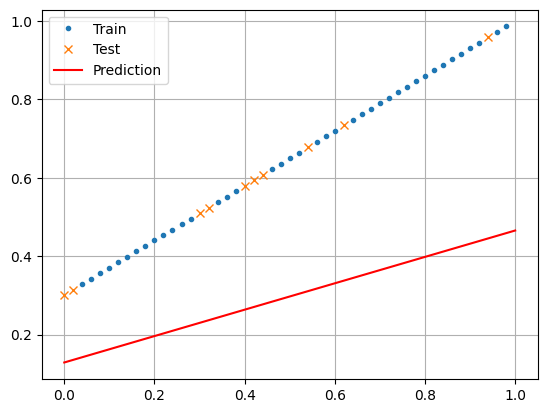

In [18]:
with torch.inference_mode():
  x = torch.arange(0, 1.1, 0.5)
  plot_train_test()
  plt.plot(x, lr(x), 'r', label='Prediction')
  plt.legend()

## 3. Training

In [19]:
loss_fn = nn.L1Loss() # Mean Absolute Error (MAE)

optimizer = torch.optim.SGD(params=lr.parameters(),
                            lr=0.002,
                            momentum=0.9)

In [20]:
EPOCHS = 500
LOSS = []
TEST_LOSS = []
for epoch in range(EPOCHS):
  lr.train() # train mode

  # 1. Forward
  y_pred = lr(x_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Backward
  optimizer.zero_grad()
  loss.backward()

  # 4. Optimizer step
  optimizer.step()

  # 5. Test
  lr.eval()
  with torch.inference_mode():
    test_pred = lr(x_test)
    test_loss = loss_fn(test_pred, y_test)

  LOSS.append(loss)
  TEST_LOSS.append(test_loss)

  if epoch % 25 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')


Epoch: 0 | Loss: 0.3573867976665497 | Test Loss: 0.31410443782806396
Epoch: 25 | Loss: 0.053936295211315155 | Test Loss: 0.07331909984350204
Epoch: 50 | Loss: 0.041129834949970245 | Test Loss: 0.03090791404247284
Epoch: 75 | Loss: 0.015085825696587563 | Test Loss: 0.01246885396540165
Epoch: 100 | Loss: 0.0029392563737928867 | Test Loss: 0.0025654733180999756
Epoch: 125 | Loss: 0.0008270948892459273 | Test Loss: 0.0004800349415745586
Epoch: 150 | Loss: 0.0023203990422189236 | Test Loss: 0.0015916407573968172
Epoch: 175 | Loss: 0.0043786680325865746 | Test Loss: 0.00272635230794549
Epoch: 200 | Loss: 0.0025795369874686003 | Test Loss: 0.0009599715704098344
Epoch: 225 | Loss: 0.00405392050743103 | Test Loss: 0.0006465494516305625
Epoch: 250 | Loss: 0.0007934831082820892 | Test Loss: 0.000513613224029541
Epoch: 275 | Loss: 0.0006145775550976396 | Test Loss: 0.0011854410404339433
Epoch: 300 | Loss: 0.0016519486671313643 | Test Loss: 0.0005794644239358604
Epoch: 325 | Loss: 0.002091763075441

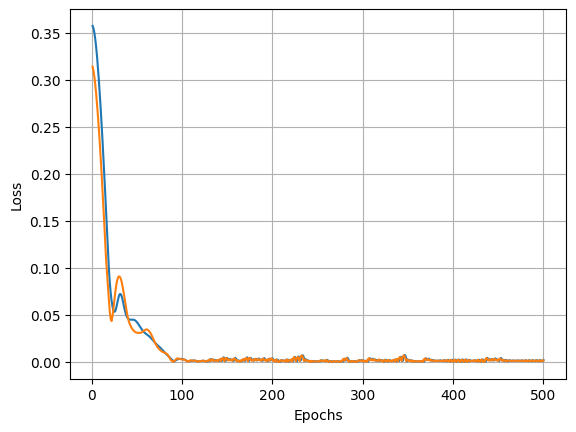

In [24]:
plt.plot(torch.arange(1, EPOCHS+1), torch.tensor(LOSS), label='Train loss')
plt.plot(torch.arange(1, EPOCHS+1), torch.tensor(TEST_LOSS), label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

In [25]:
print(lr.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([0.6989])), ('bias', tensor([0.2988]))])
0.7 0.3


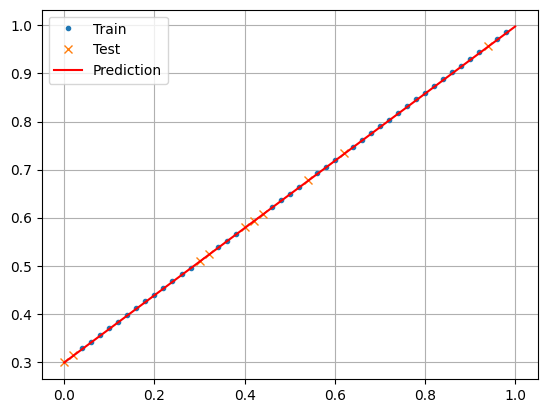

In [26]:
with torch.inference_mode():
  x = torch.arange(0, 1.1, 0.5)
  plot_train_test()
  plt.plot(x, lr(x), 'r', label='Prediction')
  plt.legend()